<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Financial_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Financial Theory

### 불확실성과 리스크

In [1]:
import numpy as np
S0 = 10
B0 = 10

In [2]:
S1 = np.array((20, 5))
B1 = np.array((11, 11))
M0 = np.array((S0, B0))
M0

array([10, 10])

In [3]:
M1 = np.array((S1, B1)).T
M1

array([[20, 11],
       [ 5, 11]])

In [4]:
K = 14.5
C1 = np.maximum(S1 - K, 0)
C1

array([5.5, 0. ])

In [5]:
phi = np.linalg.solve(M1, C1)
phi

array([ 0.36666667, -0.16666667])

In [6]:
np.allclose(C1, np.dot(M1, phi))
C0 = np.dot(M0, phi)
C0

np.float64(2.0)

### 기대효용 이론

In [7]:
def u(x):
    return np.sqrt(x)

In [8]:
phi_A = np.array((0.75, 0.25))
phi_D = np.array((0.25, 0.75))

In [9]:
np.dot(M0, phi_A) == np.dot(M0, phi_D)

np.True_

In [10]:
A1 = np.dot(M1, phi_A)
A1

array([17.75,  6.5 ])

In [11]:
D1 = np.dot(M1, phi_D)
D1

array([13.25,  9.5 ])

In [12]:
P = np.array((0.5, 0.5))

In [13]:
def EUT(x):
    return np.dot(P, u(x))

In [14]:
EUT(A1)

np.float64(3.381292321692286)

In [15]:
EUT(D1)

np.float64(3.3611309730623735)

In [16]:
from scipy.optimize import minimize

In [17]:
w = 10
cons = {'type': 'eq', 'fun': lambda phi: np.dot(M0, phi) - w}

In [18]:
def EUT_(phi):
    x = np.dot(M1, phi)
    return EUT(x)

In [19]:
opt = minimize(lambda phi: -EUT_(phi),
               x0=phi_A,
               constraints=cons)

In [20]:
opt

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -3.385015999493397
           x: [ 6.112e-01  3.888e-01]
         nit: 4
         jac: [-1.692e+00 -1.693e+00]
        nfev: 12
        njev: 4
 multipliers: [-1.693e-01]

In [21]:
EUT_(opt['x'])

np.float64(3.385015999493397)

In [22]:
np.dot(M0, opt['x'])

np.float64(10.0)

### 평균-분산 포트폴리오 이론

In [23]:
rS = S1 / S0 - 1
rS

array([ 1. , -0.5])

In [24]:
rB = B1 / B0 - 1
rB

array([0.1, 0.1])

In [25]:
def mu(rX):
    return np.dot(P, rX)
mu(rS)

np.float64(0.25)

In [26]:
mu(rB)

np.float64(0.10000000000000009)

In [27]:
rM = M1 / M0 - 1
rM

array([[ 1. ,  0.1],
       [-0.5,  0.1]])

In [28]:
mu(rM)

array([0.25, 0.1 ])

In [29]:
def var(rX):
    return ((rX - mu(rX)) ** 2).mean() # 분산함수

In [30]:
var(rS)

np.float64(0.5625)

In [31]:
var(rB)

np.float64(0.0)

In [32]:
def sigma(rX):
    return np.sqrt(var(rX))  # 변동성(표준편차) 함수

In [33]:
sigma(rS)

np.float64(0.75)

In [34]:
sigma(rB)

np.float64(0.0)

In [35]:
np.cov(rM.T, aweights=P, ddof=0) # 공분산 행렬

array([[0.5625, 0.    ],
       [0.    , 0.    ]])

In [36]:
phi = np.array((0.5, 0.5)) # 가중치 동일

In [37]:
def mu_phi(phi):
    return np.dot(phi, mu(rM))

In [38]:
mu_phi(phi) # 포트폴리오 기대수익률

np.float64(0.17500000000000004)

In [39]:
def var_phi(phi):
    cv = np.cov(rM.T, aweights=P, ddof=0)
    return np.dot(phi, np.dot(cv, phi))

In [40]:
var_phi(phi) # 포트폴리오 분산

np.float64(0.140625)

In [41]:
def sigma_phi(phi):
    return var_phi(phi) ** 0.5

In [42]:
sigma_phi(phi)  # 포트폴리오 표준편차(변동성)

np.float64(0.375)

In [43]:
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [44]:
phi_mcs = np.random.random((2, 200))

In [45]:
phi_mcs = (phi_mcs / phi_mcs.sum(axis=0)).T  # 전체 합이 1인 무작위 가중치 포트폴리오

In [46]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi))
                for phi in phi_mcs])

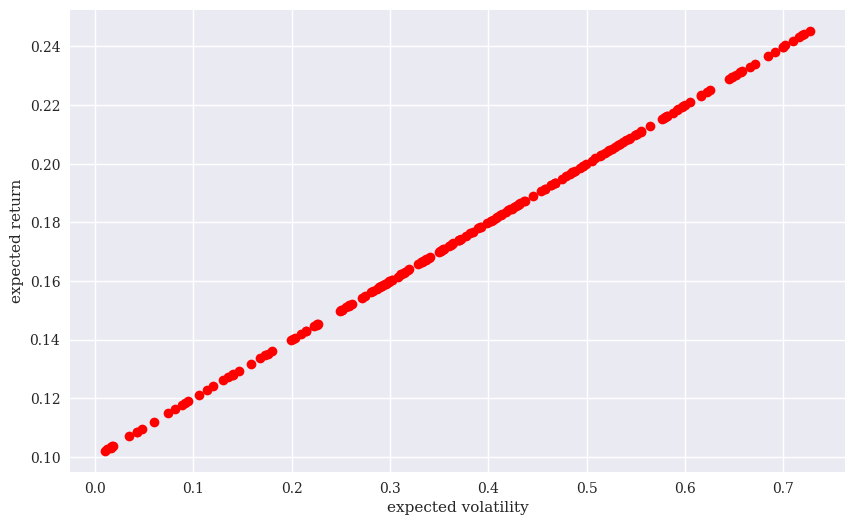

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return');

In [48]:
P = np.ones(3) / 3
P

array([0.33333333, 0.33333333, 0.33333333])

In [49]:
S0 = 10
S1 = np.array((20, 10, 5))
T0 = 10
T1 = np.array((1, 12, 13))

In [50]:
M0 = np.array((S0, T0))
M0

array([10, 10])

In [51]:
M1 = np.array((S1, T1)).T
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [52]:
rM = M1 / M0 - 1
rM

array([[ 1. , -0.9],
       [ 0. ,  0.2],
       [-0.5,  0.3]])

In [53]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi))
                for phi in phi_mcs])

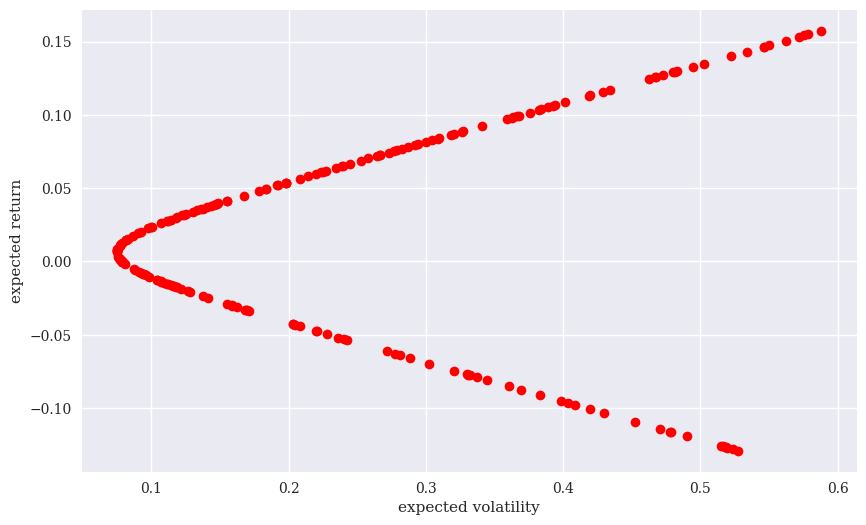

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return');

In [55]:
cons = {'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1}
bnds = ((0, 1), (0, 1))

In [56]:
min_var = minimize(sigma_phi, (0.5, 0.5),
                   constraints=cons, bounds=bnds)

In [57]:
min_var

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.07481322946903253
           x: [ 4.651e-01  5.349e-01]
         nit: 4
         jac: [ 7.427e-02  7.529e-02]
        nfev: 13
        njev: 4
 multipliers: [ 7.481e-02]

In [58]:
def sharpe(phi):
    return mu_phi(phi) / sigma_phi(phi)

In [59]:
max_sharpe = minimize(lambda phi: -sharpe(phi), (0.5, 0.5),
               constraints=cons, bounds=bnds)

In [60]:
max_sharpe

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.27216540990278126
           x: [ 6.673e-01  3.327e-01]
         nit: 9
         jac: [ 1.205e-04 -2.417e-04]
        nfev: 29
        njev: 9
 multipliers: [ 1.396e-06]

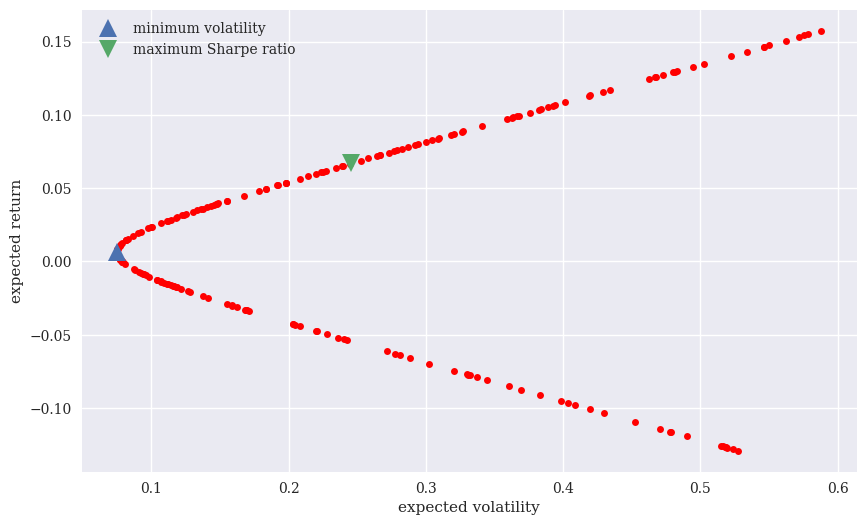

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro', ms=5)
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),
         '^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),
         'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [62]:
cons = [{'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1},
       {'type': 'eq', 'fun': lambda phi: mu_phi(phi) - target}]
bnds = ((0, 1), (0, 1))

In [63]:
targets = np.linspace(mu_phi(min_var['x']), 0.16)

In [64]:
frontier = []
for target in targets:
    phi_eff = minimize(sigma_phi, (0.5, 0.5),
                       constraints=cons, bounds=bnds)['x']
    frontier.append((sigma_phi(phi_eff), mu_phi(phi_eff)))
frontier = np.array(frontier)

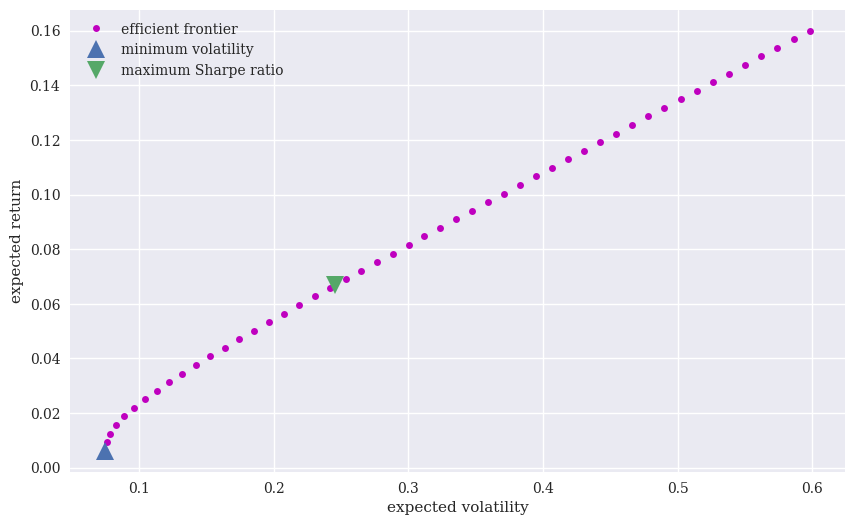

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'mo', ms=5,
         label='efficient frontier')
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),
         '^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),
         'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

### Capital Asset Pricing Model: CAPM

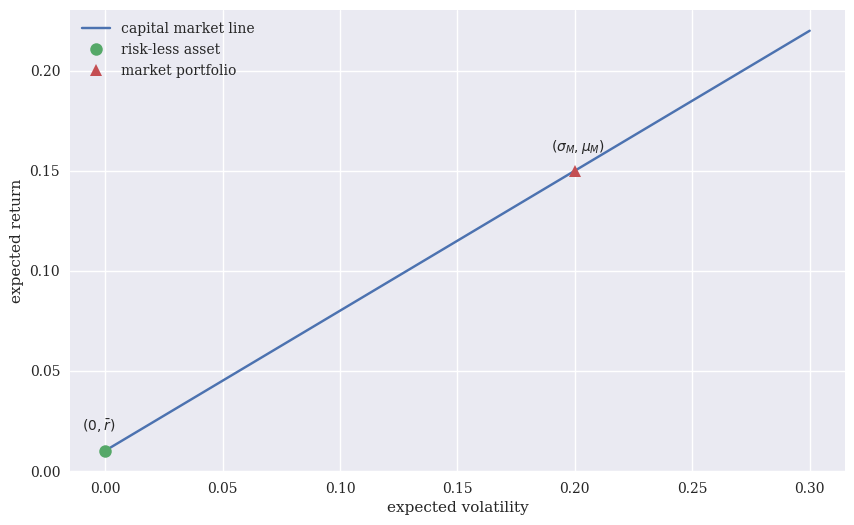

In [66]:
plt.figure(figsize=(10, 6))
plt.plot((0, 0.3), (0.01, 0.22), label='capital market line')
plt.plot(0, 0.01, 'o', ms=9, label='risk-less asset')
plt.plot(0.2, 0.15, '^', ms=9, label='market portfolio')
plt.annotate('$(0, \\bar{r})$', (0, 0.01), (-0.01, 0.02))
plt.annotate('$(\sigma_M, \mu_M)$', (0.2, 0.15), (0.19, 0.16))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [67]:
phi_M = np.array((0.8, 0.2))
mu_M = mu_phi(phi_M)
mu_M

np.float64(0.10666666666666666)

In [68]:
sigma_M = sigma_phi(phi_M)
sigma_M

np.float64(0.39474323581566567)

In [69]:
r = 0.0025

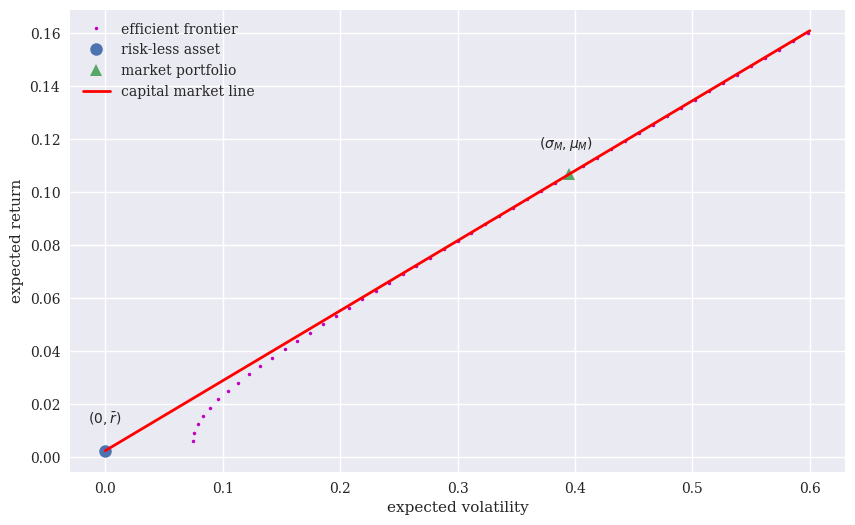

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'm.', ms=5,
         label='efficient frontier')
plt.plot(0, r, 'o', ms=9, label='risk-less asset')
plt.plot(sigma_M, mu_M, '^', ms=9, label='market portfolio')
plt.plot((0, 0.6), (r, r + ((mu_M - r) / sigma_M) * 0.6),
         'r', label='capital market line', lw=2.0)
plt.annotate('$(0, \\bar{r})$', (0, r), (-0.015, r + 0.01))
plt.annotate('$(\sigma_M, \mu_M)$', (sigma_M, mu_M),
             (sigma_M - 0.025, mu_M + 0.01))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [71]:
def U(p):
    mu, sigma = p
    return mu - 1 / 2 * (sigma ** 2 + mu ** 2)

In [72]:
cons = {'type': 'eq',
        'fun': lambda p: p[0] - (r + (mu_M - r) / sigma_M * p[1])}

In [73]:
opt = minimize(lambda p: -U(p), (0.1, 0.3), constraints=cons)
opt

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.0348851868267394
           x: [ 6.744e-02  2.461e-01]
         nit: 2
         jac: [-9.326e-01  2.461e-01]
        nfev: 6
        njev: 2
 multipliers: [-9.326e-01]

In [74]:
from sympy import *
init_printing(use_unicode=False, use_latex=False)

In [75]:
mu, sigma, b, v = symbols('mu sigma b v')

In [76]:
sol = solve('mu - b / 2 * (sigma ** 2 + mu ** 2) - v', mu)
sol

        _________________________     _________________________     
       /    2      2                 /    2      2                  
 1 - \/  - b *sigma  - 2*b*v + 1   \/  - b *sigma  - 2*b*v + 1  + 1 
[--------------------------------, --------------------------------]
                b                                 b                 

In [77]:
u1 = sol[0].subs({'b': 1, 'v': 0.1})
u1

       ______________
      /            2 
1 - \/  0.8 - sigma  

In [78]:
u2 = sol[0].subs({'b': 1, 'v': 0.125})
u2

       _______________
      /             2 
1 - \/  0.75 - sigma  

In [79]:
f1 = lambdify(sigma, u1)
f2 = lambdify(sigma, u2)

In [80]:
sigma_ = np.linspace(0.0, 0.5)
u1_ = f1(sigma_)
u2_ = f2(sigma_)

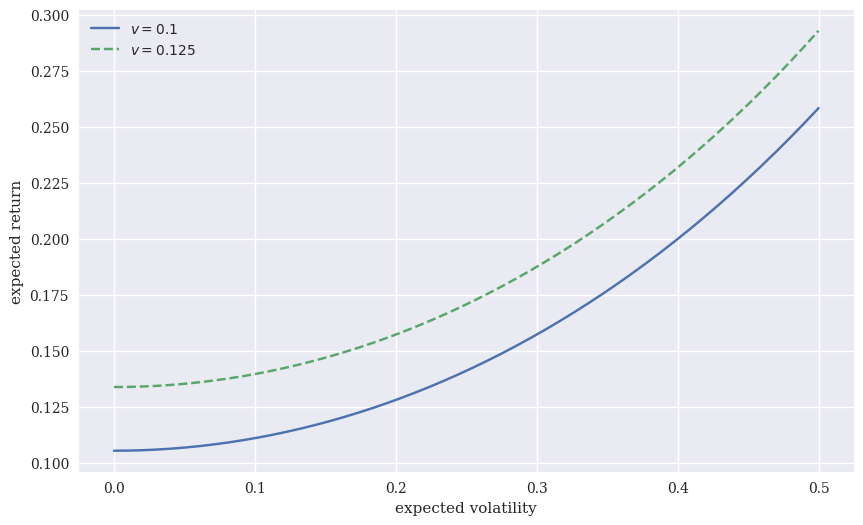

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_, u1_, label='$v=0.1$')
plt.plot(sigma_, u2_, '--', label='$v=0.125$')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [82]:
u = sol[0].subs({'b': 1, 'v': -opt['fun']})
u

       ____________________________
      /                          2 
1 - \/  0.930229626346521 - sigma  

In [83]:
f = lambdify(sigma, u)

In [84]:
u_ = f(sigma_)

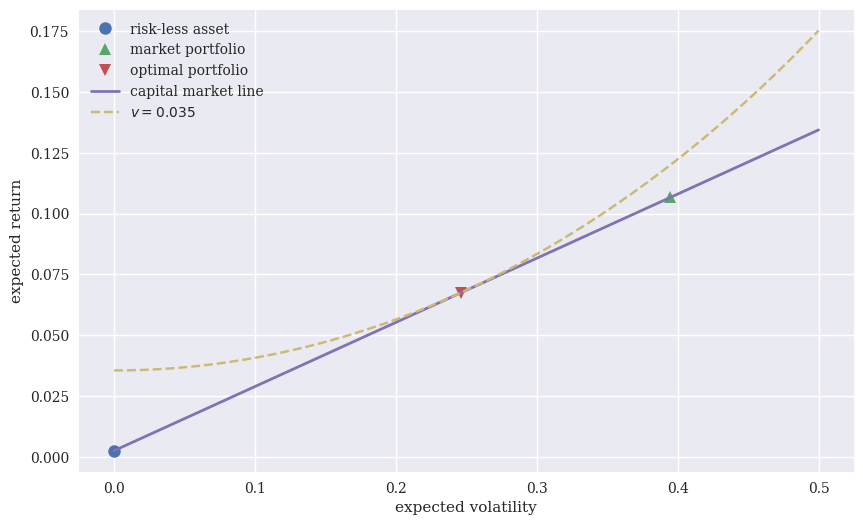

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(0, r, 'o', ms=9, label='risk-less asset')
plt.plot(sigma_M, mu_M, '^', ms=9, label='market portfolio')
plt.plot(opt['x'][1], opt['x'][0], 'v', ms=9, label='optimal portfolio')
plt.plot((0, 0.5), (r, r + (mu_M - r) / sigma_M * 0.5),
         label='capital market line', lw=2.0)
plt.plot(sigma_, u_, '--', label='$v={}$'.format(-round(opt['fun'], 3)))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

### Arbitrage Pricing Theory

In [87]:
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [88]:
M0

array([10, 10])

In [89]:
V1 = np.array((12, 15, 7)) # 세 번째 자산의 payoff

In [90]:
reg = np.linalg.lstsq(M1, V1, rcond=-1)[0]
reg  # 최적 회귀 인수값, 요인 적재량

array([0.6141665 , 0.50030531])

In [91]:
np.dot(M1, reg)

array([12.78363525, 12.14532872,  9.57480155])

In [92]:
np.dot(M1, reg) - V1

array([ 0.78363525, -2.85467128,  2.57480155])

In [93]:
V0 = np.dot(M0, reg)
V0

np.float64(11.144718094850402)

In [94]:
U0 = 10
U1 = np.array((12, 5, 11))  # 새로운 리스크 요인 추가

In [95]:
M0_ = np.array((S0, T0, U0))
M1_ = np.concatenate((M1.T, np.array([U1,]))).T
M1_  # 증가한 시장 payoff 행렬

array([[20,  1, 12],
       [10, 12,  5],
       [ 5, 13, 11]])

In [96]:
np.linalg.matrix_rank(M1_)

np.int64(3)

In [97]:
reg = np.linalg.lstsq(M1_, V1, rcond=-1)[0]
reg

array([ 0.9575179 ,  0.72553699, -0.65632458])

In [98]:
np.allclose(np.dot(M1_, reg), V1) # 복제 잔차는 0

True

In [99]:
V0_ = np.dot(M0_, reg)
V0_

np.float64(10.267303102625307)